# Variational AutoEncoder (VAE)
Train a VAE on the MNIST handwritten digit dataset. 

This makes use of: the custom Keras model class defined in vaegan.vae.py, our
class for loading the MNIST dataset defined in vaegan.data, and our custom Keras
callback in vaegan.callbacks.

A directory called 'output' will be created to save figures and the trained
model.


In [1]:
nEpochs=40  # orig, longer, more reasonable amount of training
#nEpochs=3  # quick testing during development

## 1. Import 3rd party libraries

In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload


2025-05-30 10:12:48.435464: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748617968.460285   32027 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748617968.468279   32027 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748617968.488111   32027 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748617968.488130   32027 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748617968.488132   32027 computation_placer.cc:177] computation placer alr

## 2. Import our own classes (that we will complete together)

In [3]:
# Import our own classes 
from vaegan.data import MNIST
from vaegan.callbacks import SaveImages
import vaegan.vae_SOLUTIONS
# import sys
# sys.path.append("04_ExerciseCodeAndInstructions/HPO/vaegan")
# from vae_SOLUTIONS import * 


## 3. Show some our data

I0000 00:00:1748617973.054554   32027 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11934 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:82:00.0, compute capability: 6.0
/project/nanocourse/SWE_OOP/train11/Module_2_Materials/04_ExerciseCodeAndInstructions/HPO/vaegan/data.py:67: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


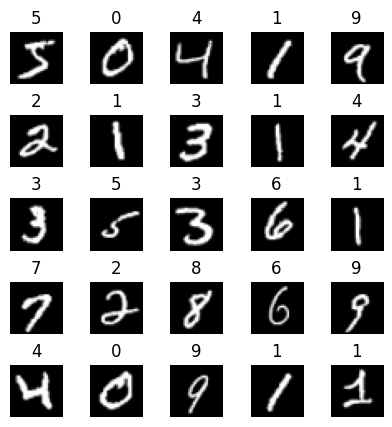

In [4]:
# Create output directory if it doesn't exist yet.
output_dir = './outputs/mnist_vae'
os.makedirs(output_dir, exist_ok=True)
    
# Instantiate the MNIST class containing our training data.
data = MNIST()

# Show some example images and their labels.
data.show_example_images(os.path.join(output_dir, 'example_images.png'))

## 4. Construct the model using the python class you completed

In [6]:
pyModule = reload(vaegan.vae_SOLUTIONS)
    
# Create the model. Note that we're using mostly the default arguments, but this is
# where you might want to play around with different loss weights.
tf.random.set_seed(1234)
model = pyModule.VAE()

# This step tells Keras to compute the explicit output shapes of each layer.
# Otherwise, the layers will have dynamic/variable output shapes which is not
# compatible with saving and loading.
model.compute_output_shape((None, 32, 32, 1))
model.decoder.compute_output_shape((None, 8))



Loaded version: vaegan.vae_SOLUTIONS


TensorShape([None, 32, 32, 1])

## <span style="color:blue"> Correct model dimensions </span>
    

<span style="color:blue"> === OVERALL MODEL ==== </span>

```
Layer (type)                 Output Shape              Param #   
=================================================================
encoder (Encoder)            multiple                  240896    
_________________________________________________________________
decoder (Decoder)            multiple                  182145    
_________________________________________________________________
recon_loss (Mean)            multiple                  2         
_________________________________________________________________
kl_loss (Mean)               multiple                  2         
_________________________________________________________________
total_loss (Mean)            multiple                  2         
=================================================================
Total params: 423,047
Trainable params: 422,337
Non-trainable params: 710

```
<span style="color:blue"> === ENCODER SUBMODEL ====</span>
```
Layer (type)                    Output Shape         Param #     Connected to                     
==================================================================================================
input_4 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 32, 32, 16)   272         input_4[0][0]                    
__________________________________________________________________________________________________
bn0 (BatchNormalization)        (None, 32, 32, 16)   64          conv0[1][0]                      
__________________________________________________________________________________________________
relu0 (ReLU)                    (None, 32, 32, 16)   0           bn0[1][0]                        
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 32)   8224        relu0[1][0]                      
__________________________________________________________________________________________________
bn1 (BatchNormalization)        (None, 16, 16, 32)   128         conv1[1][0]                      
__________________________________________________________________________________________________
relu1 (ReLU)                    (None, 16, 16, 32)   0           bn1[1][0]                        
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 8, 8, 64)     32832       relu1[1][0]                      
__________________________________________________________________________________________________
bn2 (BatchNormalization)        (None, 8, 8, 64)     256         conv2[1][0]                      
__________________________________________________________________________________________________
relu2 (ReLU)                    (None, 8, 8, 64)     0           bn2[1][0]                        
__________________________________________________________________________________________________
conv3 (Conv2D)                  (None, 4, 4, 64)     65600       relu2[1][0]                      
__________________________________________________________________________________________________
bn3 (BatchNormalization)        (None, 4, 4, 64)     256         conv3[1][0]                      
__________________________________________________________________________________________________
relu3 (ReLU)                    (None, 4, 4, 64)     0           bn3[1][0]                        
__________________________________________________________________________________________________
flatten (Flatten)               (None, 1024)         0           relu3[1][0]                      
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          131200      flatten[1][0]                    
__________________________________________________________________________________________________
dense_mean (Dense)              (None, 8)            1032        dense[1][0]                      
__________________________________________________________________________________________________
dense_logvar (Dense)            (None, 8)            1032        dense[1][0]                      
==================================================================================================
Total params: 240,896
Trainable params: 240,544
Non-trainable params: 352

```
<span style="color:blue"> === DECODER SUBMODEL ====</span>
```
Layer (type)                 Output Shape              Param #   
=================================================================
input_5 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              9216      
_________________________________________________________________
relu_dense (ReLU)            (None, 1024)              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 64)          0         
_________________________________________________________________
tconv0 (Conv2DTranspose)     (None, 8, 8, 64)          65600     
_________________________________________________________________
bn0 (BatchNormalization)     (None, 8, 8, 64)          256       
_________________________________________________________________
relu0 (ReLU)                 (None, 8, 8, 64)          0         
_________________________________________________________________
tconv1 (Conv2DTranspose)     (None, 16, 16, 64)        65600     
_________________________________________________________________
bn1 (BatchNormalization)     (None, 16, 16, 64)        256       
_________________________________________________________________
relu1 (ReLU)                 (None, 16, 16, 64)        0         
_________________________________________________________________
tconv2 (Conv2DTranspose)     (None, 32, 32, 32)        32800     
_________________________________________________________________
bn2 (BatchNormalization)     (None, 32, 32, 32)        128       
_________________________________________________________________
relu2 (ReLU)                 (None, 32, 32, 32)        0         
_________________________________________________________________
tconv3 (Conv2DTranspose)     (None, 32, 32, 16)        8208      
_________________________________________________________________
bn3 (BatchNormalization)     (None, 32, 32, 16)        64        
_________________________________________________________________
relu3 (ReLU)                 (None, 32, 32, 16)        0         
_________________________________________________________________
conv_out (Conv2D)            (None, 32, 32, 1)         17        
_________________________________________________________________
sigmoid_out (Activation)     (None, 32, 32, 1)         0         
=================================================================
Total params: 182,145
Trainable params: 181,793
Non-trainable params: 352

```
## 5. Now check your model's  dimensions against this list above

In [7]:
print("=== OVERALL MODEL ====")
model.summary()
print("=== ENCODER SUBMODEL ====")
enc_in = tf.keras.layers.Input(model.image_shape)
enc_out  = model.encoder.call(enc_in) 
enc = tf.keras.Model(enc_in, enc_out) 
enc.summary()
print("=== DECODER SUBMODEL ====")
dec_in = tf.keras.layers.Input(model.n_latent_dims) 
dec_out  = model.decoder.call(dec_in) 
dec = tf.keras.Model(dec_in, dec_out) 
dec.summary()



=== OVERALL MODEL ====
Model: "vae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Encoder)           multiple                  240896    
                                                                 
 decoder (Decoder)           (None, 32, 32, 1)         182145    
                                                                 
Total params: 423047 (1.61 MB)
Trainable params: 422337 (1.61 MB)
Non-trainable params: 710 (2.77 KB)
_________________________________________________________________
=== ENCODER SUBMODEL ====
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 1)]          0         []                            
                                                              

## 6. Compile the model 

In [8]:
# Compile the model with an optimizer. The learning rate of the optimizer can be
# specified here. Normally, this is also where you would select a loss function
# and any metrics. However, our custom model defines the loss functions inside
# its __init__ constructor, so we don't need to do that here. 
# model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.001))
model.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.001))
# Instantiate our custom callback to save a few example reconstructions and
# generated images after each epoch.
save_images_callback = SaveImages(output_dir=output_dir, 
                                  model=model,
                                  example_images=data.images_train[:10],
                                  n_generated_images=10,
                                  n_latent_dims=model.n_latent_dims)

## 7. Train (fit) the model on the data 

In [9]:
# Train the model. Just like any off-the-shelf Keras model, we just call fit.
# Under the hood, Keras will call the train_step method of our custom subclass
# on each mini-batch and automatically loop through the training data. It will
# take care of all the details, like converting numpy arrays to tensors, showing
# a progress bar, and tracking the loss over the epochs.
logs = model.fit(data.images_train,
                 batch_size=128,
                 epochs=nEpochs,
                 callbacks=[save_images_callback])

Epoch 1/40


I0000 00:00:1748618039.686719   32294 cuda_dnn.cc:529] Loaded cuDNN version 90300


469/469 [==============================] - 28s 48ms/step - recon_loss: 35.9655 - kl_loss: 9.4169 - total_loss: 45.3824
Epoch 2/40
469/469 [==============================] - 23s 49ms/step - recon_loss: 22.7219 - kl_loss: 11.0618 - total_loss: 33.7837
Epoch 3/40
469/469 [==============================] - 21s 44ms/step - recon_loss: 20.9330 - kl_loss: 11.4209 - total_loss: 32.3539
Epoch 4/40
469/469 [==============================] - 23s 49ms/step - recon_loss: 19.8502 - kl_loss: 11.5761 - total_loss: 31.4263
Epoch 5/40
469/469 [==============================] - 17s 35ms/step - recon_loss: 19.0842 - kl_loss: 11.7107 - total_loss: 30.7948
Epoch 6/40
469/469 [==============================] - 23s 49ms/step - recon_loss: 18.6032 - kl_loss: 11.8102 - total_loss: 30.4134
Epoch 7/40
469/469 [==============================] - 20s 44ms/step - recon_loss: 18.1439 - kl_loss: 11.9145 - total_loss: 30.0584
Epoch 8/40
469/469 [==============================] - 23s 49ms/step - recon_loss: 17.8990 - kl_

KeyboardInterrupt: 

## 8. Training saves results to disk, now also plot training curves

In [ ]:
# Plot the training curves, which are stored in logs.history as a dict. Keys of
# this dict are the metric names, while the corresponding values are arrays.
fig, ax = plt.subplots()

for loss_name in ['recon_loss', 'kl_loss', 'total_loss']:
    loss_values = logs.history[loss_name]
    x = np.arange(len(loss_values))
    ax.plot(x, loss_values, label=loss_name)
    
ax.legend()
ax.set_xlabel('Epoch')
fig.savefig(os.path.join(output_dir, 'training_curves.png'), transparent=False)
# fig.show()

# Save the model 
model.save(os.path.join(output_dir, 'vae'))

In [ ]:
# train with validation

In [25]:
def sample_from_normal(dist_mean, dist_logvar):
    """Sample a point from a normal distribution, parameterized by a given mean 
    and log-variance.

    Args:
        dist_mean (tensor): Distribution means.
        dist_logvar (tensor): Distribution log-variances.

    Returns:
        tensor: Sampled points
    """    

    # ===== ToImplement  Exercise3a ====
    # ========================        
    # The encoder in a VAE map an imput image, x, not to a single latent vector z, i.e. a point estimate, but rather to a distribution
    # of likely z's. Typically the form of that disribution is assumed to follow a normal distrubtion parameterized by its mean and variance. 
    #
    # The second half of the VAE is the decoder. 
    # The decoder must reconstruct the original image from the latent representation, however, to do that it needs to 
    # draw a sample from the learned distribution over latent space. That is it needs to pick one those likley z's and expand it via
    # transposed convolutions.
    # 
    # To help us build the VAE, we need you to implement the sampling of a point from a normal distribution parameterized by a given me and and 
    # log-variance (learned by the encoder). These are provided as function arguments: dist_mean, and dist_logvar
    # In fact the encoder has learned a tensor of means (one for each element of z) and a tensor of log-variances (again one for each element of z)  
    # 
    # HINT: See the lecture notes and use tf.random.normal  and tf.exp
    # Store the result in sampledZ so it can be returned.
    # 
    z = tf.random.normal(shape=tf.shape(dist_mean))
    sampledZ = dist_mean + tf.exp(0.5 * dist_logvar) * z
    # ========================   
    return sampledZ
def kl_divergence(dist_mean, dist_logvar):
    """Compute the closed-form KL Divergence between a given distribution and a 
    normal prior distribution with mean 0 and variance 1.

    Args:
        dist_mean (tensor): Distribution means.
        dist_logvar (tensor): Distribution log-variances.

    """    
    # ===== ToImplement Exercise3b ====
    # ========================    

    # An exact solution to the VAE is intractable therefore we turn to an approximate method (variational inferencing). 
    # This imposes a prior on our solution to regularize it.
    # In particular we impose a prior in the form of a standard normal distribution with mean 0 and variance 1.
    # Hint see the lecture notes. tf.square, tf.reduce_sum, tf.reduce_mean, tf.exp may be helful

    # 1. First compute the KL divergence within each sample. 
    kl = -0.5 * (1 + dist_logvar - tf.square(dist_mean) - tf.exp(dist_logvar))

    # 2. Next, Sum the KL divergence within each sample
    kl_per_sample = tf.reduce_sum(kl, axis=1)

    # 3. Finally compute the mean KL divergence over all samples, and return the result in divKL_AllSamples
    # e.g.  divKL_AllSamples=.... 
    divKL_AllSamples=tf.reduce_mean(kl_per_sample)


    # ========================    

    return divKL_AllSamples
    
class ManualValidationCallback(tf.keras.callbacks.Callback):
    def __init__(self, val_data):
        self.val_data = val_data

    def on_epoch_end(self, epoch, logs=None):
        recon_loss, kl_loss = self.compute_val_loss(self.val_data)
        logs['val_recon_loss'] = recon_loss
        logs['val_kl_loss'] = kl_loss
        logs['val_loss'] = recon_loss + kl_loss
        print(f"\nEpoch {epoch + 1}: val_loss={logs['val_loss']:.4f}, val_recon_loss={recon_loss:.4f}, val_kl_loss={kl_loss:.4f}")

    def compute_val_loss(self, x_val):
        z_mean, z_logvar = model.encoder(x_val, training=False)
        z = sample_from_normal(z_mean, z_logvar)
        x_recon = model.decoder(z, training=False)

        #
        loss_recon = tf.keras.losses.MeanSquaredError(name='recon_mse', reduction='none')
        recon_loss_pixel = self.loss_recon(x_val, x_recon)
        recon_loss_sample = tf.reduce_sum(recon_loss_pixel, axis=(1, 2))
        recon_loss = tf.reduce_mean(recon_loss_sample)
        
        kl_loss = kl_divergence(z_mean,z_logvar)
        return float(recon_loss), float(kl_loss)


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True 
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

val_callback = ManualValidationCallback(data.images_test)

logs = model.fit(data.images_train,
                 batch_size=128,
                 epochs=3,
                 callbacks=[save_images_callback, val_callback])



Epoch 1/3
468/469 [============================>.] - ETA: 0s - recon_loss: 14.0273 - kl_loss: 12.6211 - total_loss: 26.6483

AttributeError: 'ManualValidationCallback' object has no attribute 'loss_recon'

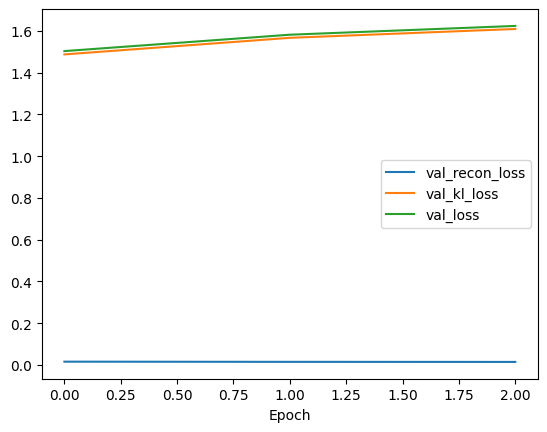

In [19]:
import matplotlib.pyplot as plt

# Plot the training curves, which are stored in logs.history as a dict. Keys of
# this dict are the metric names, while the corresponding values are arrays.
fig, ax = plt.subplots()

for loss_name in ['val_recon_loss', 'val_kl_loss', 'val_loss']:
    loss_values = logs.history[loss_name]
    x = np.arange(len(loss_values))
    ax.plot(x, loss_values, label=loss_name)
    
ax.legend()
ax.set_xlabel('Epoch')
fig.savefig(os.path.join(output_dir, 'training_curves.png'), transparent=False)


In [ ]:
# Plot the training curves, which are stored in logs.history as a dict. Keys of
# this dict are the metric names, while the corresponding values are arrays.
fig, ax = plt.subplots()

for loss_name in ['recon_loss', 'kl_loss', 'total_loss']:
    loss_values = logs.history[loss_name]
    x = np.arange(len(loss_values))
    ax.plot(x, loss_values, label=loss_name)
    
ax.legend()
ax.set_xlabel('Epoch')
fig.savefig(os.path.join(output_dir, 'training_curves.png'), transparent=False)
# fig.show()

# Save the model

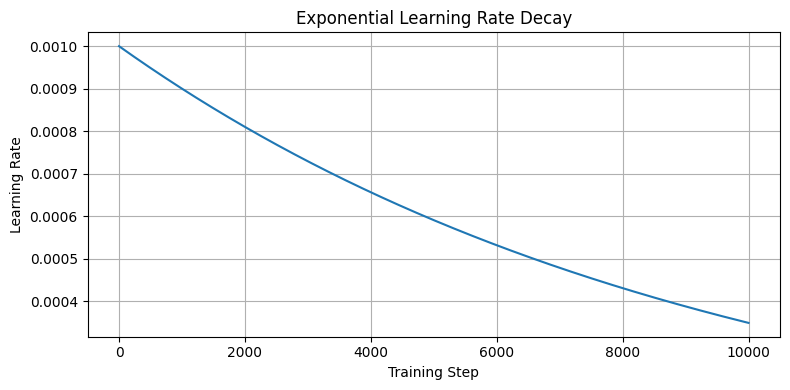

In [24]:

import tensorflow as tf
import matplotlib.pyplot as plt

# Define the schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=False
)

# Plot learning rate over training steps
steps = tf.range(0, 10000, dtype=tf.float32)
lrs = [lr_schedule(step).numpy() for step in steps]

plt.figure(figsize=(8, 4))
plt.plot(steps, lrs)
plt.title("Exponential Learning Rate Decay")
plt.xlabel("Training Step")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.tight_layout()
plt.show()




   










